## Geo-Inferencing using Shapely

## **Overview**

Geo-Inferencing done with [Shapely](https://pypi.org/project/Shapely/) and visualizing data using [Matplotlib](https://pypi.org/project/matplotlib/)

### **Case Study**

**Client A** needs a system that's very dependent on user's location. He wants to be able to roll out services gradually starting from [Techiman](https://en.wikipedia.org/wiki/Techiman), a leading market town in South Ghana. He wants a way to restrict usage to only users within the Techiman geographical area. How then can you help him out ?

### **Possible Solution**

I went over to Google Maps, and searched for [Techiman](https://www.google.com/maps/place/Techiman/@7.589643,-1.9512214,14z/data=!3m1!4b1!4m5!3m4!1s0xfda8f6cf4c278ad:0x35b150d58886b9fa!8m2!3d7.5908801!4d-1.9343555) and manually selected some reasonable number of coordinates along the boundaries. I then proceeded to [Simple GeoJSON Editor](https://google-developers.appspot.com/maps/documentation/utils/geojson/) to visualize the coordinates i got from the Google Maps. 

Comparing the images below, I am convinced enough that the accuracy of my coordinates is pretty much okay. I now dive into code.

<img alt="Google Maps"  width="50%" height="100px" src="./data/a.jpg"/>
<img alt="GeoJson Editor"  width="50%" height="auto" src="./data/b.jpg"/>

In [296]:
import json
from shapely.geometry import Point, shape
from matplotlib import patches, pyplot
import numpy as np

In [297]:
# load GeoJSON file containing geojson data
with open('data/data.json') as geodata:
    js = json.load(geodata)

In [298]:
feature = js['features'][0]
polygon = shape(feature['geometry'])

In [299]:
def isInPolygon(point: Point):
    return polygon.contains(point)

In [300]:
def getPolygonProps():
    data = {}
    data['area'] = polygon.area
    data['length'] = polygon.length
    data['bounds'] = polygon.bounds
    data['center'] = polygon.centroid.coords[0]
    return data

In [301]:
def plotPolygon():
    x,y = polygon.exterior.xy
    fig = pyplot.figure(1, figsize=(5,5), dpi=90)
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_title('Techiman')


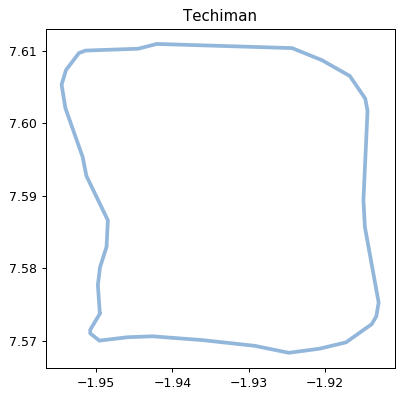

In [302]:
plotPolygon()

In [303]:
area = getPolygonArea()
print(area)

0.0014700825975000086


In [304]:
# a truthy test coordinate
true_point = Point(-1.930622, 7.582752)

print('{point} result is {result}'.format(point=true_point, result=isInPolygon(true_point)))

POINT (-1.930622 7.582752) result is True


In [305]:
# a falsy test coordinate
false_point = Point(-1.914357, 7.583687)

print('{point} result is {result}'.format(point=false_point, result=isInPolygon(false_point)))

POINT (-1.914357 7.583687) result is False
